# Airplane Market Share Analysis: 

by Ellen Jatul

In [1]:
#Data 
import pandas as pd
import numpy as np

#plots
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
d=pd.read_csv('/Users/ellenjatul/Downloads/Consumer_Airfare_Report__Table_5_-_Detailed_Fare_Information_For_Highest_and_Lowest_Fare_Markets_Under_750_Miles_20240122.csv')

In [3]:
d.head(5)

,tbl,Year,quarter,mkt_fare,citymarketid_1,citymarketid_2,city1,city2,carairlineid,car,...,carpaxshare,caravgfare,fareinc_min,fareinc_minpaxsh,fareinc_max,fare_inc_maxpaxsh,fare_inc_x3paxsh,Geocoded_City1,Geocoded_City2,tbl5pk
0,Table 5,2006,3,87.41,34057,31884,"Portland, OR","Spokane, WA",19393,WN,...,0.59,80.44,75,0.44,125,0.25,0.00,"Portland, OR\n(45.516018, -122.681425)","Spokane, WA\n(47.658999, -117.425022)",20063340573188419393WN
1,Table 5,1997,4,224.47,30721,30198,"Boston, MA (Metropolitan Area)","Pittsburgh, PA",20355,US,...,0.92,226.21,75,0.07,400,0.25,0.42,"Boston, MA (Metropolitan Area)\n(42.358894, -7...","Pittsburgh, PA\n(40.442169, -79.994945)",19974307213019820355US
2,Table 5,2003,1,234.32,31995,30852,"Greensboro/High Point, NC","Washington, DC (Metropolitan Area)",20355,US,...,0.98,234.92,100,0.15,375,0.11,0.32,"Greensboro/High Point, NC\n(36.072701, -79.793...","Washington, DC (Metropolitan Area)\n(38.892062...",20031319953085220355US
3,Table 5,1998,3,71.25,32467,33195,"Miami, FL (Metropolitan Area)","Tampa, FL (Metropolitan Area)",19393,WN,...,0.64,65.54,75,0.99,75,0.99,0.00,"Miami, FL (Metropolitan Area)\n(44.977479, -93...","Tampa, FL (Metropolitan Area)\n(37.8606, -78.8...",19983324673319519393WN
4,Table 5,1999,3,235.25,30713,30325,"Boise, ID","Denver, CO",19977,UA,...,0.78,239.90,125,0.09,550,0.06,0.18,"Boise, ID\n(43.597772, -83.884521)","Denver, CO\n(39.738453, -104.984853)",19993307133032519977UA


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14504 entries, 0 to 14503
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tbl                14504 non-null  object 
 1   Year               14504 non-null  int64  
 2   quarter            14504 non-null  int64  
 3   mkt_fare           14504 non-null  float64
 4   citymarketid_1     14504 non-null  int64  
 5   citymarketid_2     14504 non-null  int64  
 6   city1              14504 non-null  object 
 7   city2              14504 non-null  object 
 8   carairlineid       14504 non-null  int64  
 9   car                14504 non-null  object 
 10  carpax             14504 non-null  int64  
 11  carpaxshare        14504 non-null  float64
 12  caravgfare         14504 non-null  float64
 13  fareinc_min        14504 non-null  int64  
 14  fareinc_minpaxsh   14504 non-null  float64
 15  fareinc_max        14504 non-null  int64  
 16  fare_inc_maxpaxsh  145

In [5]:
data= d[['Year','quarter','mkt_fare', 'city1','city2', 'car','carpaxshare','caravgfare', 'fareinc_min','fareinc_minpaxsh','fareinc_max','fare_inc_maxpaxsh', 'fare_inc_x3paxsh']]

data

,Year,quarter,mkt_fare,city1,city2,car,carpaxshare,caravgfare,fareinc_min,fareinc_minpaxsh,fareinc_max,fare_inc_maxpaxsh,fare_inc_x3paxsh
0,2006,3,87.41,"Portland, OR","Spokane, WA",WN,0.5900,80.44,75,0.4400,125,0.2500,0.0000
1,1997,4,224.47,"Boston, MA (Metropolitan Area)","Pittsburgh, PA",US,0.9200,226.21,75,0.0700,400,0.2500,0.4200
2,2003,1,234.32,"Greensboro/High Point, NC","Washington, DC (Metropolitan Area)",US,0.9800,234.92,100,0.1500,375,0.1100,0.3200
3,1998,3,71.25,"Miami, FL (Metropolitan Area)","Tampa, FL (Metropolitan Area)",WN,0.6400,65.54,75,0.9900,75,0.9900,0.0000
4,1999,3,235.25,"Boise, ID","Denver, CO",UA,0.7800,239.90,125,0.0900,550,0.0600,0.1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14499,2023,3,269.86,"Madison, WI","Washington, DC (Metropolitan Area)",AA,0.2065,260.61,200,0.1432,325,0.0750,0.0136
14500,2023,3,269.86,"Madison, WI","Washington, DC (Metropolitan Area)",DL,0.2328,282.39,200,0.0827,375,0.0605,0.0101
14501,2023,3,137.48,"Richmond, VA","Tampa, FL (Metropolitan Area)",MX,0.2249,87.94,75,0.3814,125,0.1529,0.0086
14502,2023,3,276.25,"Salt Lake City, UT","Spokane, WA",DL,0.4559,281.18,200,0.0873,350,0.0620,0.0095


In [10]:
#filtered_data = df.loc[df['year'].between(min_year, max_year)]
ad = data.loc[data['Year'].between(2019, 2023)]
ad.head(5)

,Year,quarter,mkt_fare,city1,city2,car,carpaxshare,caravgfare,fareinc_min,fareinc_minpaxsh,fareinc_max,fare_inc_maxpaxsh,fare_inc_x3paxsh
975,2019,4,109.85,"Colorado Springs, CO","Phoenix, AZ",F9,0.4385,89.33,75,0.4183,150,0.0742,0.0000
1001,2022,2,133.16,"Colorado Springs, CO","Phoenix, AZ",F9,0.1078,80.88,75,0.4946,125,0.1071,0.0021
1490,2022,2,133.16,"Colorado Springs, CO","Phoenix, AZ",WN,0.3777,138.52,75,0.1247,225,0.0623,0.0935
1516,2019,4,264.52,"Dallas/Fort Worth, TX","Des Moines, IA",AA,0.4167,284.84,225,0.1516,400,0.0541,0.0141
1566,2020,3,117.56,"Albuquerque, NM","Las Vegas, NV",WN,0.4618,116.02,75,0.2806,150,0.3777,0.0468


# Data Preprocessing

In [9]:
ad.isna().any()

Year                 False
quarter              False
mkt_fare             False
city1                False
city2                False
car                  False
carpaxshare          False
caravgfare           False
fareinc_min          False
fareinc_minpaxsh     False
fareinc_max          False
fare_inc_maxpaxsh    False
fare_inc_x3paxsh     False
dtype: bool

# Exploratory Analysis

In [12]:
sd= ad[['Year','car']]

y19 = sd[sd['Year']== 2019].shape[0]

In [13]:
y20 = sd[sd['Year']== 2019].shape[0]
y21 = sd[sd['Year']== 2021].shape[0]
y22 = sd[sd['Year']== 2022].shape[0]
y23 = sd[sd['Year']== 2023].shape[0]

In [19]:
y19,y20,y21,y22,y23

(315, 315, 406, 325, 260)

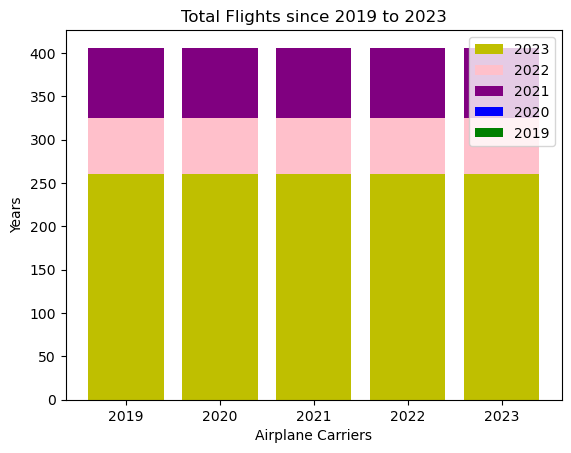

In [26]:
#count the number of flights has done in each year
plt.bar(ad['Year'],y19, color = 'g')
plt.bar(ad['Year'],y20, color = 'b')
plt.bar(ad['Year'],y21, color = 'purple')
plt.bar(ad['Year'],y22, color = 'pink')
plt.bar(ad['Year'],y23, color = 'y')
plt.xlabel('Airplane Carriers')
plt.ylabel('Years')
plt.title('Total Flights since 2019 to 2023')
plt.legend(['2019','2020','2021','2022','2023'], reverse = True)
plt.show()

In [ ]:
#find marketshare for each airline: airlines %/ total mrkt share %
#add mrkt fare and sum it for each airline by year


In [39]:
faresum19 = ad[ad['Year']== 2019].groupby('car')['mkt_fare'].sum().reset_index()
mktsum19= faresum19['mkt_fare'].sum()
mktsum19


60808.17999999999

In [62]:
faresum19['p_mkt_fare']= faresum19['mkt_fare'] / mktsum19 * 100
faresum19

,car,mkt_fare,p_mkt_fare
0,AA,22855.35,37.585979
1,AS,4069.78,6.692817
2,B6,1586.85,2.609600
3,DL,12731.86,20.937742
4,F9,312.76,0.514339
5,G4,3289.98,5.410423
6,NK,1393.85,2.292208
7,UA,5313.00,8.737311
8,WN,9254.75,15.219581


In [30]:
faresum20 = ad[ad['Year']== 2020].groupby('car')['mkt_fare'].sum().reset_index()
faresum20

,car,mkt_fare
0,AA,16542.33
1,AS,2539.32
2,B6,1257.00
3,DL,13918.83
4,F9,326.60
5,G4,3225.82
6,NK,510.73
7,UA,4222.68
8,WN,10706.81


In [40]:
mktsum20= faresum20['mkt_fare'].sum()
mktsum20

53250.12

In [61]:
faresum20['p_mkt_fare']= faresum20['mkt_fare'] / mktsum20 * 100
faresum20

,car,mkt_fare,p_mkt_fare
0,AA,16542.33,31.065338
1,AS,2539.32,4.768665
2,B6,1257.00,2.360558
3,DL,13918.83,26.138589
4,F9,326.60,0.613332
5,G4,3225.82,6.057864
6,NK,510.73,0.959115
7,UA,4222.68,7.929898
8,WN,10706.81,20.106640


In [31]:
faresum21 = ad[ad['Year']== 2021].groupby('car')['mkt_fare'].sum().reset_index()
faresum21

,car,mkt_fare
0,AA,19496.32
1,AS,1677.61
2,B6,1203.58
3,DL,21031.17
4,F9,467.72
5,G4,4660.76
6,MX,272.48
7,NK,1247.06
8,UA,6317.18
9,WN,10866.62


In [41]:
mktsum21= faresum21['mkt_fare'].sum()
mktsum21

67240.5

In [60]:
faresum21['p_mkt_fare']= faresum21['mkt_fare'] / mktsum21 * 100
faresum21

,car,mkt_fare,p_mkt_fare
0,AA,19496.32,28.994906
1,AS,1677.61,2.494940
2,B6,1203.58,1.789963
3,DL,21031.17,31.277534
4,F9,467.72,0.695593
5,G4,4660.76,6.931477
6,MX,272.48,0.405232
7,NK,1247.06,1.854626
8,UA,6317.18,9.394903
9,WN,10866.62,16.160826


In [57]:
faresum22 = ad[ad['Year']== 2022].groupby('car')['mkt_fare'].sum().reset_index()
faresum22

,car,mkt_fare
0,AA,22445.20
1,AS,1084.21
2,B6,695.01
3,DL,16056.86
4,F9,1096.22
5,G4,3196.55
6,MX,135.94
7,NK,2455.02
8,SY,306.06
9,UA,3133.85


In [58]:
mktsum22= faresum22['mkt_fare'].sum()
mktsum22

62117.69

In [59]:
faresum22['p_mkt_fare']= faresum22['mkt_fare'] / mktsum22 * 100
faresum22

,car,mkt_fare,p_mkt_fare
0,AA,22445.20,36.133346
1,AS,1084.21,1.745413
2,B6,695.01,1.118860
3,DL,16056.86,25.849094
4,F9,1096.22,1.764747
5,G4,3196.55,5.145958
6,MX,135.94,0.218843
7,NK,2455.02,3.952207
8,SY,306.06,0.492710
9,UA,3133.85,5.045020


In [52]:
faresum23 = ad[ad['Year']== 2023].groupby('car')['mkt_fare'].sum().reset_index()
faresum23

,car,mkt_fare
0,3M,406.52
1,AA,15871.19
2,AS,763.93
3,B6,1483.49
4,DL,13330.73
5,F9,136.33
6,G4,2915.85
7,MX,1141.95
8,NK,2056.88
9,SY,795.68


In [55]:
faresum23['p_mkt_fare']= faresum23['mkt_fare'] / mktsum23 * 100
faresum23

,car,mkt_fare,p_mkt_fare
0,3M,406.52,0.798933
1,AA,15871.19,31.191617
2,AS,763.93,1.501350
3,B6,1483.49,2.915500
4,DL,13330.73,26.198856
5,F9,136.33,0.267929
6,G4,2915.85,5.730514
7,MX,1141.95,2.244272
8,NK,2056.88,4.042382
9,SY,795.68,1.563748


In [43]:
mktsum23= faresum23['mkt_fare'].sum()
mktsum23

50882.87

# Data Visualizations

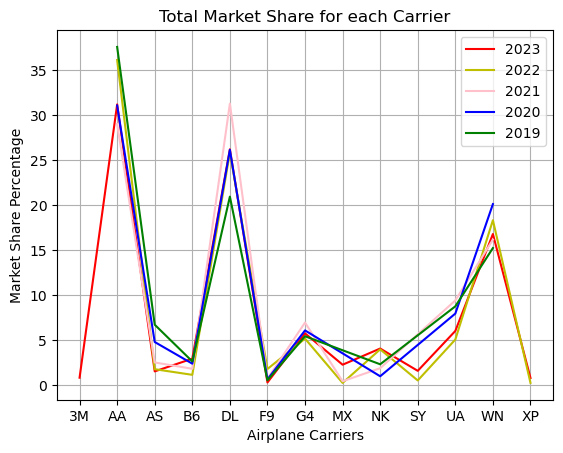

In [69]:
#split up visualizations by year first: x-axis --> year, y-axis: fare

#legend be all the diff carriers

plt.plot(faresum23['car'],faresum23['p_mkt_fare'], color = 'r')
plt.plot(faresum22['car'],faresum22['p_mkt_fare'], color = 'y')
plt.plot(faresum21['car'],faresum21['p_mkt_fare'], color = 'pink')
plt.plot(faresum20['car'],faresum20['p_mkt_fare'], color = 'b')
plt.plot(faresum19['car'],faresum19['p_mkt_fare'], color = 'g')

plt.xlabel('Airplane Carriers')
plt.ylabel('Market Share Percentage')
plt.title('Total Market Share for each Carrier')
plt.legend(['2023','2022','2021','2020','2019'])
plt.grid(True)
plt.show()

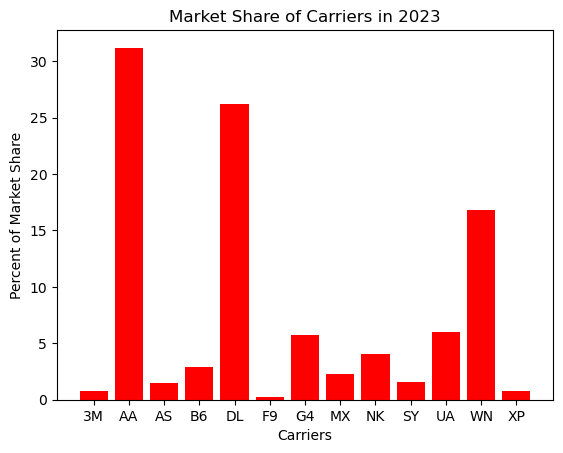

In [76]:
#Breakdown by year 2023
plt.bar(faresum23['car'],faresum23['p_mkt_fare'], color = 'r')
plt.xlabel('Carriers')
plt.ylabel('Percent of Market Share')
plt.title('Market Share of Carriers in 2023')
plt.show()

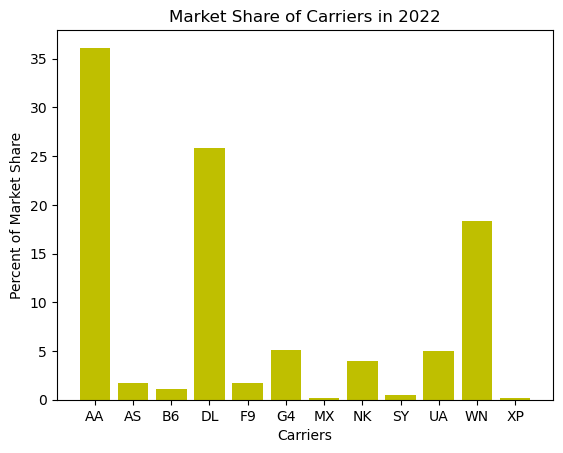

In [71]:
plt.bar(faresum22['car'],faresum22['p_mkt_fare'], color = 'y')
plt.xlabel('Carriers')
plt.ylabel('Percent of Market Share')
plt.title('Market Share of Carriers in 2022')
plt.show()

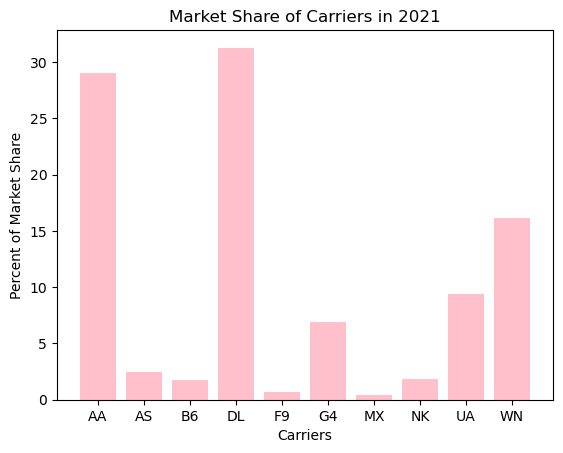

In [75]:
plt.bar(faresum21['car'],faresum21['p_mkt_fare'], color = 'pink')
plt.xlabel('Carriers')
plt.ylabel('Percent of Market Share')
plt.title('Market Share of Carriers in 2021')
plt.show()

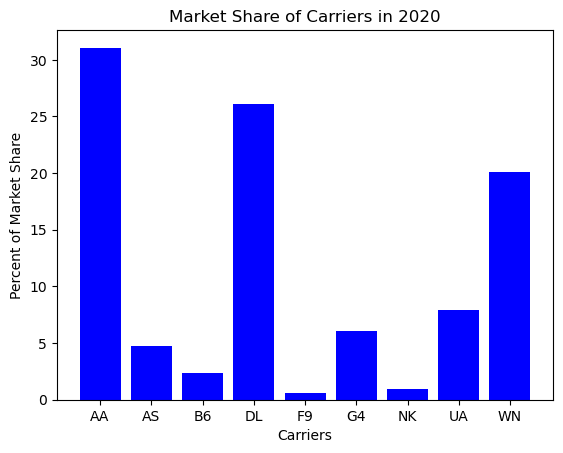

In [73]:
plt.bar(faresum20['car'],faresum20['p_mkt_fare'], color = 'b')
plt.xlabel('Carriers')
plt.ylabel('Percent of Market Share')
plt.title('Market Share of Carriers in 2020')
plt.show()

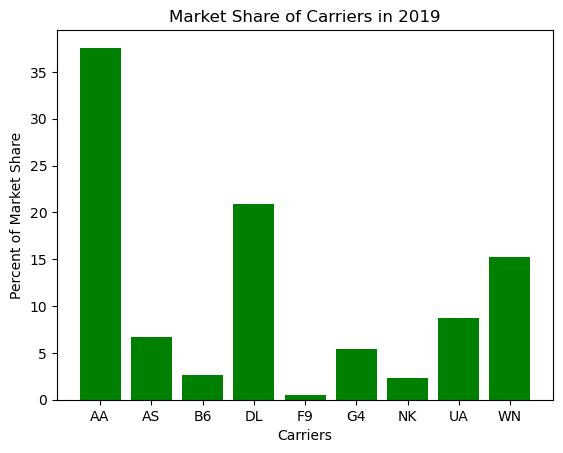

In [74]:
plt.bar(faresum19['car'],faresum19['p_mkt_fare'], color = 'g')
plt.xlabel('Carriers')
plt.ylabel('Percent of Market Share')
plt.title('Market Share of Carriers in 2019')
plt.show()

# Conclusion

In [ ]:
# data source: https://data.transportation.gov/Aviation/Consumer-Airfare-Report-Table-5-Detailed-Fare-Info/bkh6-tj42/about_data